In [29]:
from google.colab import drive     # Mounting the drive for accessing the dataset.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd

In [31]:
data= pd.read_csv("/content/drive/MyDrive/NLP/WEEK3/sentiment-analysis-on-movie-reviews/train.tsv.zip", sep="\t")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [33]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [34]:
# Count the number of occurrences of each sentiment category in the training (data) set
sentiment_counts_data = data['Sentiment'].value_counts().sort_index()

In [35]:
print("Sentiment distribution in the training set:")
sentiment_counts_data

Sentiment distribution in the training set:


,count
Sentiment,
0,7072
1,27273
2,79582
3,32927
4,9206


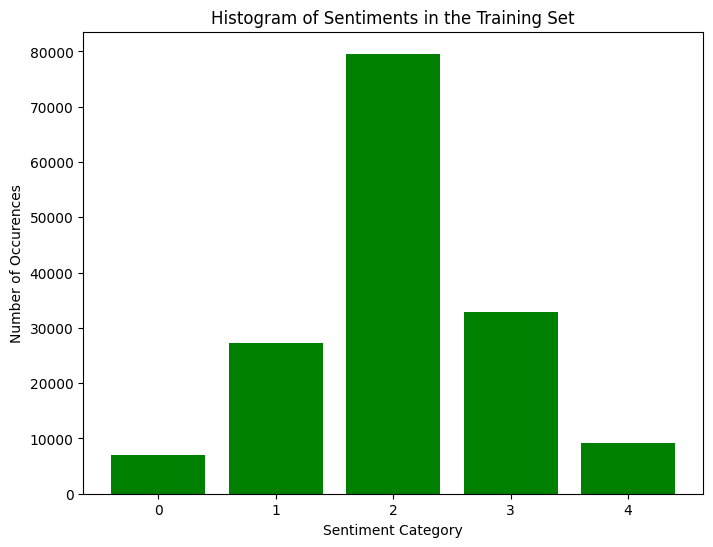

In [36]:
# To Provide a histogram of sentiments by category

import matplotlib.pyplot as plt

# Create a histogram of sentiment counts
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts_data.index, sentiment_counts_data.values, color='green')
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Occurences")
plt.title("Histogram of Sentiments in the Training Set")
plt.xticks(sentiment_counts_data.index)
plt.show()


In [37]:
                                                                                # Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize and remove symbols and numbers
from sklearn.feature_extraction.text import CountVectorizer
import re

                                                                                # Define a custom tokenizer to remove symbols and numbers
def custom_tokenizer(text):
                                                                                # Remove symbols and numbers using regex
    text = re.sub(r'\W|\d', ' ', text)
                                                                                # Tokenize by splitting on whitespace
    tokens = text.split()
    return tokens

                                                                                # Initialize the CountVectorizer with the custom tokenizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, lowercase=True)

                                                                                # Fit and transform the Phrase column to create the document-term matrix
dtm = vectorizer.fit_transform(data['Phrase'])

                                                                                # Convert the document-term matrix to a DataFrame for better readability
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

                                                                                # Display the first few rows of the document-term matrix
dtm_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,a,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split


# Split the  dataset
train_data, test_data = train_test_split(data, test_size=0.3)

# Verify the split
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 109242
Test set size: 46818


In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

                                                                                # I assumed that the 'Phrase' column is the input feature and the 'Sentiment' column is the target variable
                                                                                # We will use the CountVectorizer to transform the text data into a document-term matrix again
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, lowercase=True)

                                                                                # Transform the text data in both training and testing sets
x_train = vectorizer.fit_transform(train_data['Phrase'])
x_test = vectorizer.transform(test_data['Phrase'])

                                                                                # The target variable is the 'Sentiment' column
y_train = train_data['Sentiment']
y_test = test_data['Sentiment']



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
                                                                                # Create the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

                                                                                # Fit the model to the training data
nb_classifier.fit(x_train, y_train)


MultinomialNB()

In [41]:
                                                                                # Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

                                                                                # Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.6071


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
                                                                                # Initialize the TfidfVectorizer with the custom tokenizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase=True)

                                                                                # Transform the text data in both training and testing sets
phrase_tfidf = tfidf_vectorizer.fit_transform(data['Phrase'])

                                                                                # Target variable
y = data['Sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [44]:
# Split the  dataset
x_train_data_tfidf, x_test_data_tfidf, y_train,y_test = train_test_split(phrase_tfidf,y,test_size=0.3, random_state=42)


In [45]:
                                                                                # Create the Multinomial Naive Bayes classifier
nb_classifier_tfidf = MultinomialNB()

                                                                                # Fit the model to the TF-IDF transformed training data
nb_classifier_tfidf.fit(x_train_data_tfidf, y_train)


MultinomialNB()

In [46]:
                                                                                # Make predictions on the test data
y_pred_tfidf = nb_classifier_tfidf.predict(x_test_data_tfidf)

                                                                                # Compute the accuracy of the model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"Model Accuracy with TF-IDF: {accuracy_tfidf:.4f}")


Model Accuracy with TF-IDF: 0.5804


**Question 2:**

1. Create an account with IBM Cloud
2. Use IBM Watson Natural Language Understanding/Text Analysis to run the same
sentiment analysis as in Exercise 3.
3. Is there any difference in the results? What is IBM’s philosophy in sentiment
analysis?

In [47]:
pip install ibm-watson

In [48]:
#Use IBM Watson Natural Language Understanding/Text Analysis to run the sentiment analysis
#import required libraries
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [49]:

# IBM Watson NLU API key and URL
api_key = 'd404ZQQKOIvyQB5kJTGyvjXNMiBlsnFsXY1L5Ml_sdCA'
url = 'https://api.us-east.natural-language-understanding.watson.cloud.ibm.com/instances/1460ca5e-4e7b-44fa-b127-1588e07475b2'

# Authenticate to Watson NLU
authenticator = IAMAuthenticator(api_key)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)
natural_language_understanding.set_service_url(url)

# Input the article text
article = """
Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later
focusing on allegations of plagiarism in work she had produced throughout her academic
career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a
particularly serious charge in academia: In 2021, the president of the University of South
Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a
commencement speech. Plagiarism includes a broad range of possible offenses, from
improperly placing a citation to claiming credit for another scholar’s research or insight,
and individual institutions develop their own policies for evaluating and responding to
allegations of research misconduct. Gay defended her academic record in an op-ed
published Wednesday in the New York Times, saying that she addressed attribution
issues promptly after learning about them, and that “I have never misrepresented my
research findings, nor have I ever claimed credit for the research of others. Moreover,
the citation errors should not obscure a fundamental truth: I proudly stand by my work
and its impact on the field.”
"""

# Analyze the sentiment of the article
response = natural_language_understanding.analyze(
    text=article,
    features=Features(sentiment=SentimentOptions())
).get_result()

# Print sentiment result
print(response['sentiment']['document'])

{'score': -0.620999, 'label': 'negative'}


**Explanation:** (Comparison between the excercise 2 and excercise 3)

There is a noticeable difference in the results. IBM Watson Natural Language Understanding (NLU) concluded that the sentiment was **negative** with a score of -0.62, likely emphasizing the controversy, allegations of plagiarism, and the resignation of Claudine Gay. In contrast, the transformer model identified a **positive** sentiment with a score of 0.80, likely focusing on Gay’s defense of her academic record and the positive outlook she expressed in her op-ed.

IBM's philosophy in sentiment analysis involves a structured approach, often relying on machine learning and linguistic rules to determine sentiment based on the broader context of the text. It prioritizes overall meaning and key events. The transformer model, however, uses deep learning and is sensitive to subtleties, capturing more localized sentiment in specific parts of the text. IBM aims for accuracy in real-world applications, focusing on actionable insights from textual data for businesses and industries.

Question:3  Use the following article from the Washington Post (1/5/24) to compute the sentiment with a transformer model.


“Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later focusing on allegations of plagiarism in work she had produced throughout her academic career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a particularly serious charge in academia: In 2021, the president of the University of South Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a commencement speech. Plagiarism includes a broad range of possible offenses, from improperly placing a citation to claiming credit for another scholar’s research or insight,
and individual institutions develop their own policies for evaluating and responding to allegations of research misconduct. Gay defended her academic record in an op-ed published Wednesday in the New York Times, saying that she addressed attribution issues promptly after learning about them, and that “I have never misrepresented my research findings, nor have I ever claimed credit for the research of others. Moreover, the citation errors should not obscure a fundamental truth: I proudly stand by my work and its impact on the field.”

In [50]:
pip install transformers torch

In [51]:
from transformers import pipeline

# Load pre-trained sentiment analysis model
sentiment_analysis = pipeline("sentiment-analysis")

# Text from the article
text = (
    "Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy "
    "initially sparked by her testimony at a congressional hearing on antisemitism, and later "
    "focusing on allegations of plagiarism in work she had produced throughout her academic "
    "career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a "
    "particularly serious charge in academia: In 2021, the president of the University of South "
    "Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a "
    "commencement speech. Plagiarism includes a broad range of possible offenses, from "
    "improperly placing a citation to claiming credit for another scholar’s research or insight, "
    "and individual institutions develop their own policies for evaluating and responding to "
    "allegations of research misconduct. Gay defended her academic record in an op-ed "
    "published Wednesday in the New York Times, saying that she addressed attribution "
    "issues promptly after learning about them, and that 'I have never misrepresented my "
    "research findings, nor have I ever claimed credit for the research of others. Moreover, "
    "the citation errors should not obscure a fundamental truth: I proudly stand by my work "
    "and its impact on the field.'"
)



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [52]:
# Perform sentiment analysis
sentiment_result = sentiment_analysis(text)
print(sentiment_result)


[{'label': 'POSITIVE', 'score': 0.8040071129798889}]
